In [1]:
# import the necessary packages
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
import numpy as np
import colorsys
import argparse
import imutils
import random
import cv2
import os
from matplotlib import pyplot
from matplotlib.patches import Rectangle
%matplotlib inline

Using TensorFlow backend.


In [2]:
class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_inference"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
    # number of classes (we would normally add +1 for the background
    # but the background class is *already* included in the class
    # names)
    NUM_CLASSES = 1+80

In [3]:
config = myMaskRCNNConfig()

In [4]:
print("loading  weights for Mask R-CNN model...")
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='C:/Users/sohyeon/Mask_RCNN')

loading  weights for Mask R-CNN model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
model.load_weights('mask_rcnn_coco.h5', by_name=True)

In [6]:
class_names = ['BG','person','bicycle','car','motorcycle','airplane',
               'bus','train','truck','boat','traffic light',
               'fire hydrant','stop sign','parking meter','bench',
              'bird','cat','dog','horse','sheep','cow','elephant',
              'bear','zebra','giraffe','backpack','umbrella',
              'handbag','tie','suitcase','frisbee','skis','snowboard',
              'sports ball','kite','baseball bat','baseball glove',
              'skateboard','surfboard','tennis racket','bottle',
              'wine glass','cup','fork','knife','spoon','bowl',
              'banana','apple','sandwich','orange','broccoli',
              'carrot','hot dog','pizza','donut','cake','chair',
              'couch','potted plant','bed','dining table','toilet',
              'tv','laptop','mouse','remote','keyboard','cell phone',
              'microwave','oven','toaster','sink','refrigerator',
              'book','clock','vase','scissors','teddy bear',
              'hair drier','toothbrush']

In [7]:
# draw an image with detected objects

def draw_image_with_boxes(filename, boxes_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for box in boxes_list:
        # get coordinates
        y1, x1, y2, x2 = box
        # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
        # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color='red', lw=5)
        # draw the box
        ax.add_patch(rect)
    # show the plot
    pyplot.show()

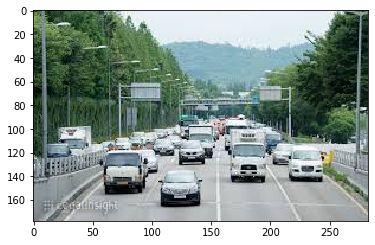

In [8]:
#test - two or more object
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img = load_img('C:/Users/sohyeon/Documents/카카오톡 받은 파일/road.jpg')
pyplot.imshow(img)
img = img_to_array(img)

In [9]:
results = model.detect([img], verbose=1)

Processing 1 images
image                    shape: (178, 283, 3)         min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


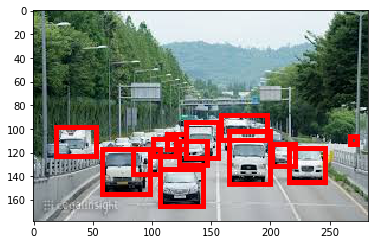

In [10]:
draw_image_with_boxes('C:/Users/sohyeon/Documents/카카오톡 받은 파일/road.jpg', results[0]['rois'])

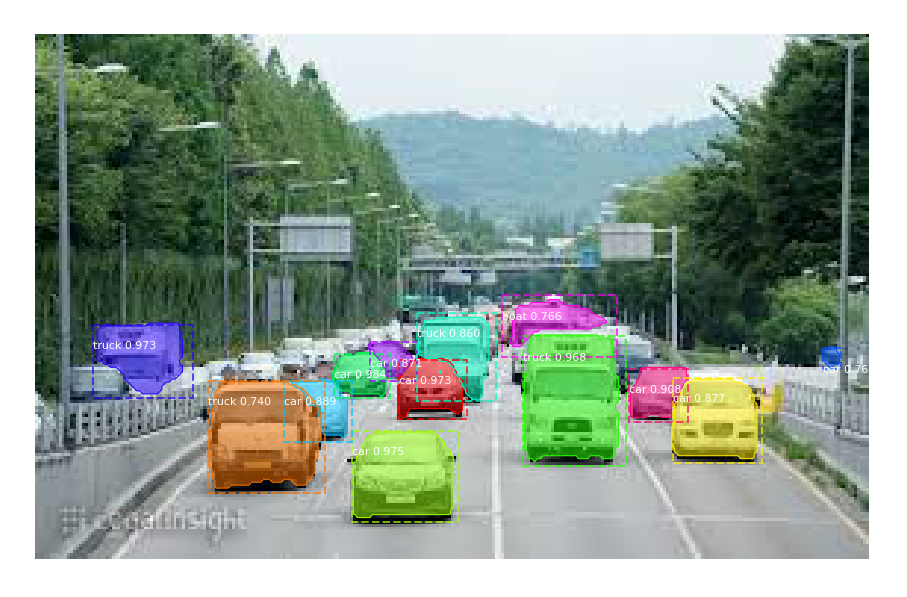

In [11]:
from mrcnn.visualize import display_instances
r = results[0]

display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

# ------------------------------------------------------------------------------------------------------

In [12]:
mask = r['masks']
mask = mask.astype(int)
mask.shape
#세번째 인자가 mask갯수

(178, 283, 13)

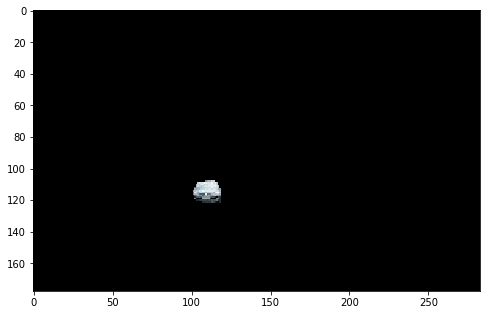

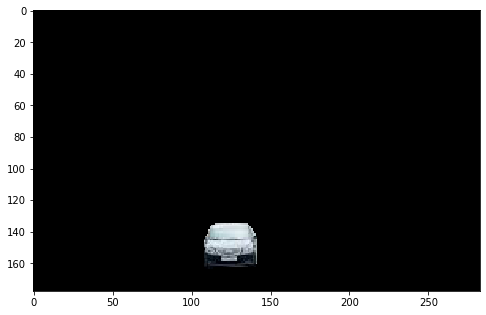

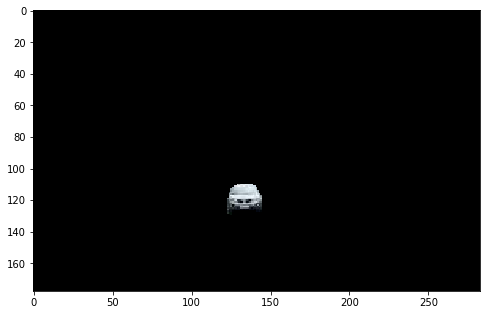

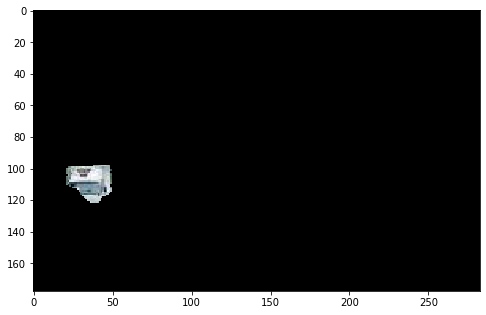

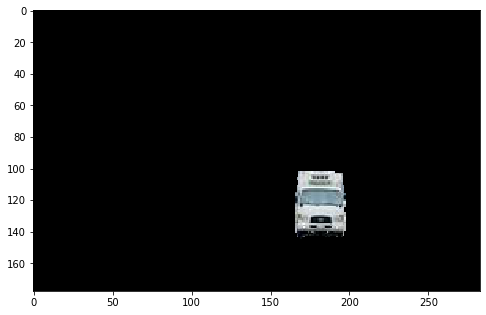

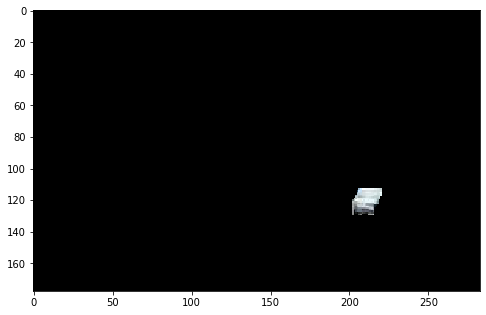

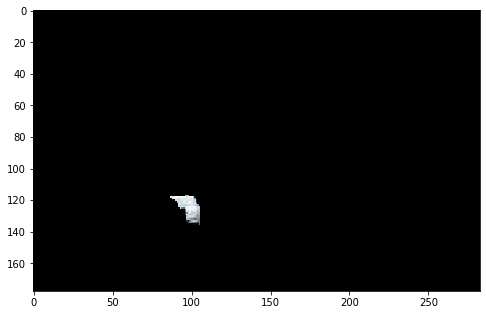

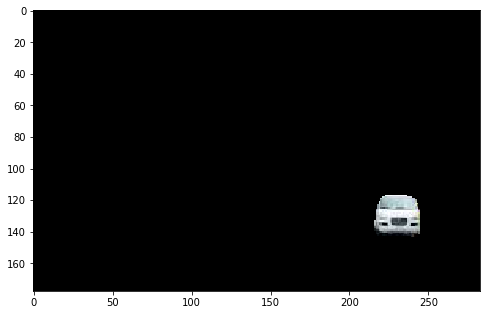

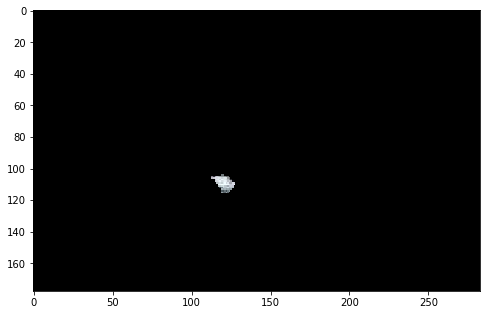

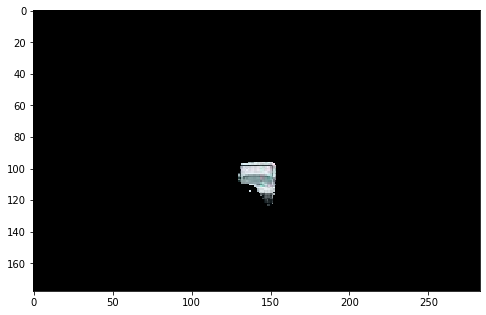

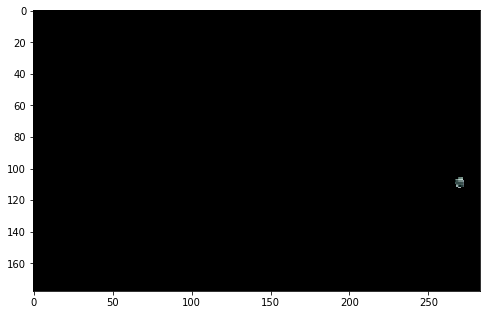

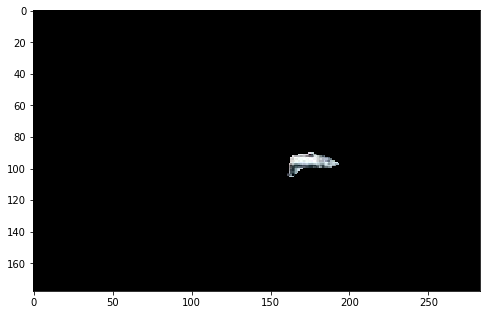

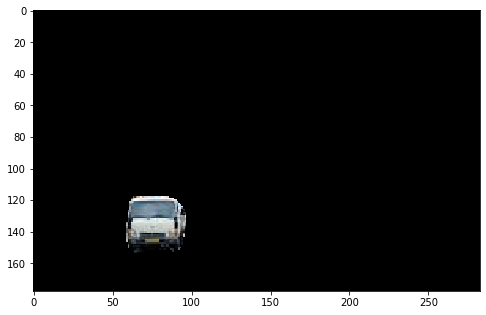

In [13]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

#mask.shape[2] = 마스크의 갯수
for i in range(mask.shape[2]):
    temp = skimage.io.imread('C:/Users/sohyeon/Documents/카카오톡 받은 파일/road.jpg')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    plt.figure(figsize=(8,8))
    plt.imshow(temp)

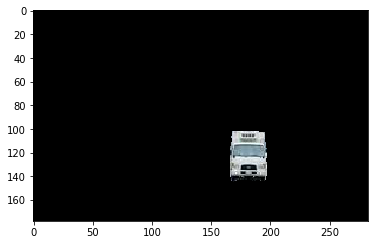

In [16]:
car_image=skimage.io.imread('C:/Users/sohyeon/Documents/카카오톡 받은 파일/road.jpg')

car_image[:,:,0]=car_image[:,:,0]*mask[:,:,4]
car_image[:,:,1]=car_image[:,:,1]*mask[:,:,4]
car_image[:,:,2]=car_image[:,:,2]*mask[:,:,4]

plt.imshow(car_image)

# ------------------------------------------------------------------------------------------------------

In [14]:
from mrcnn.visualize import draw_box

def drawBox(image): 
    length = len(r['rois'])
    arr=[i for i in range(length)]
    fig = pyplot.figure(figsize=(100,100))
    
    for i in range(length):
        arr[i] = fig.add_subplot(length,1,i+1)
        arr[i].imshow(draw_box(image,r['rois'][i],[255,0,0]).astype(np.uint8)) #이미지에 박스치기
        arr[i].set_title("("+str(i)+")")
        arr[i].axis("off")        

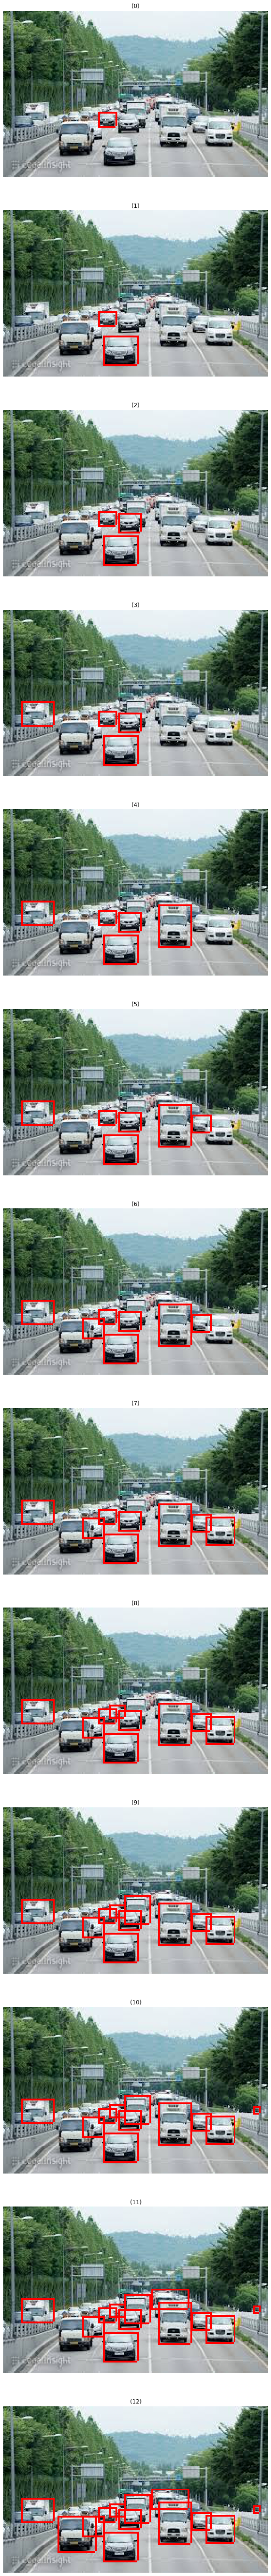

In [15]:
drawBox(img)

In [16]:
mask=r['masks'][:,:,4]

In [17]:
def boolstr_to_floatstr(v):
    if v == True:
        return '1'
    else:
        return '0'

In [18]:
def draw_mask(mask):
    mask = np.vectorize(boolstr_to_floatstr)(mask).astype(np.uint8)
    return mask

In [20]:
mask_ = draw_mask(mask)

(-0.5, 282.5, 177.5, -0.5)

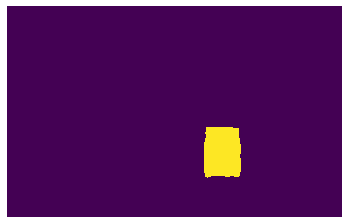

In [21]:
pyplot.imshow(mask_)
pyplot.axis("off")

In [39]:
import pickle
import cv2
import numpy as np
import platform

def hangulFilePathImageRead ( filePath ) :

    stream = open( filePath.encode("utf-8") , "rb")
    bytes = bytearray(stream.read())
    numpyArray = np.asarray(bytes, dtype=np.uint8)

    return cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)


if __name__ == '__main__':
    filePath = r"C:/Users/sohyeon/Documents/카카오톡 받은 파일/road.jpg"
    image = hangulFilePathImageRead(filePath)

(-0.5, 282.5, 177.5, -0.5)

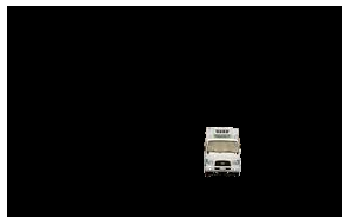

In [40]:
# img = cv2.imread(fileData)
res = cv2.bitwise_and(image,image,mask = mask_)
pyplot.imshow(res)
pyplot.axis("off")

In [41]:
if __name__ == '__main__':
    filePath = r"C:/Users/sohyeon/Documents/카카오톡 받은 파일/road2.jpg"
    bg = hangulFilePathImageRead(filePath)

(-0.5, 282.5, 177.5, -0.5)

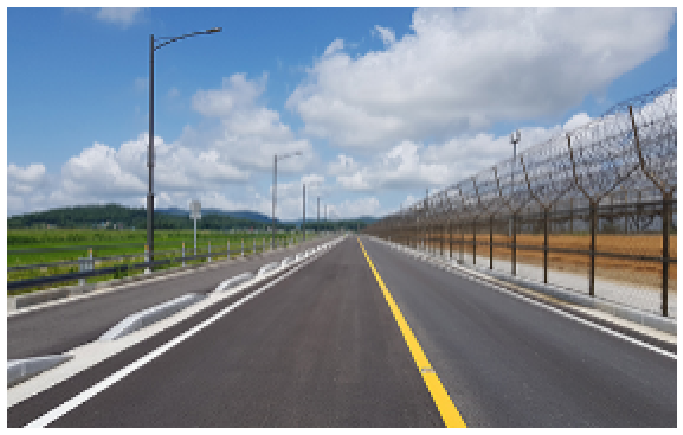

In [42]:
background = np.array(bg)
bg_h, bg_w, _ = background.shape
fg_h, fg_w, _ = np.array(image).shape
background = cv2.resize(background, dsize=(fg_w, int(fg_w * bg_h / bg_w)))

bg_h, bg_w, _ = background.shape

margin = (bg_h - fg_h) // 2

if margin > 0:
    background = background[margin:-margin, :, :]
else:
    background = cv2.copyMakeBorder(background, top=abs(margin), bottom=abs(margin), left=0, right=0, borderType=cv2.BORDER_REPLICATE)


background = cv2.resize(background, dsize=(fg_w, fg_h))
background = cv2.cvtColor(background,cv2.COLOR_BGR2RGB)

pyplot.figure(figsize=(12, 8))
pyplot.imshow(background)
pyplot.axis("off")

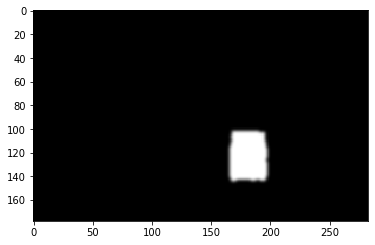

In [62]:
from skimage.segmentation import clear_border

_,alpha = cv2.threshold(mask_,0,255,cv2.THRESH_BINARY)

# alpha=clear_border(alpha) # 경계면 다듬기

alpha = cv2.GaussianBlur(alpha,(7,7),0).astype(float)

alpha = alpha / 255. # (height, width)

alpha = np.repeat(np.expand_dims(alpha, axis=2), 3, axis=2) # (height, width, 3)

pyplot.imshow(alpha)

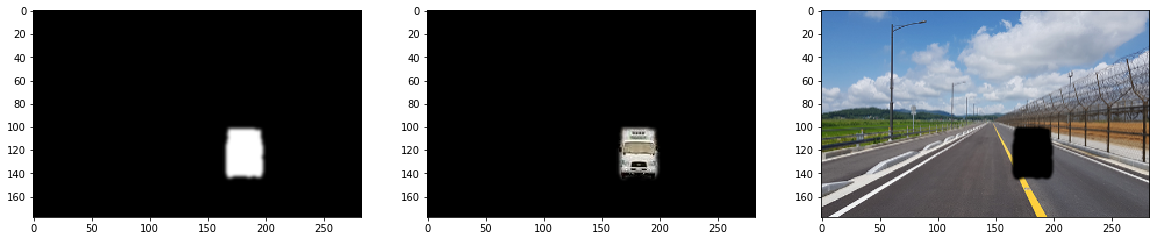

In [63]:
foreground = cv2.multiply(alpha, image.astype(float))
background = cv2.multiply(1. - alpha, background.astype(float))  
fig, axes = pyplot.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(alpha)
axes[1].imshow(foreground.astype(np.uint8))
axes[2].imshow(background.astype(np.uint8))

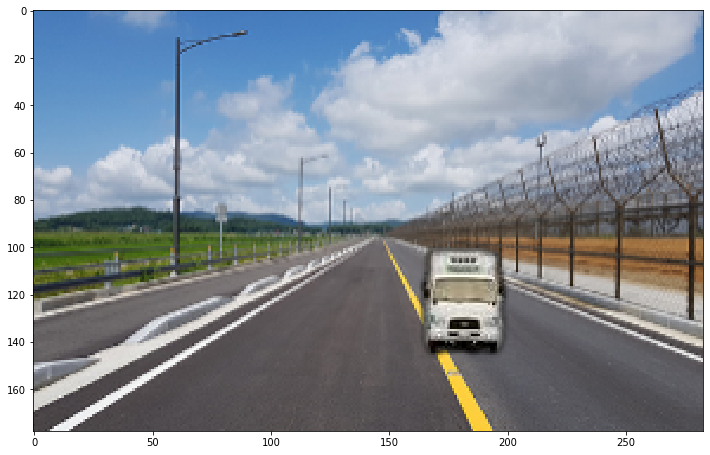

In [64]:
from PIL import Image

final = cv2.add(foreground, background).astype(np.uint8)

# Image.fromarray(final).save('final.jpg')

pyplot.figure(figsize=(12, 12))
pyplot.imshow(final)